In [29]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy.misc import derivative

In [30]:
def f(x):
    return x**4 + 8 * x**3 - 6 * x**2 - 72 * x + 90

### Utilities

In [31]:
derivative_spacing = 1e-10
epsilon = 1e-5

F = lambda n:reduce(lambda x, n:[x[1], x[0] + x[1]], range(n), [0, 1])[0]

In [32]:
def displayResult(f, x, i):
    print(f"Iterations = {i}")
    print(f"Point = ({x}, {f(x)})")

## Main functions

In [33]:
def findLocalizedSections(f, a, b):
    return (-10, 5)

In [34]:
def bisectionMethod(f, a, b):
    assert a <= b, "'a' cannot be greater than 'b'"
    
    iterations = 0
    
    x_k = (a + b) / 2
    while (abs(a - b) > epsilon):
        iterations = iterations + 1
        
        f_k_derivative = derivative(f, x_k, dx = derivative_spacing)
        
        if (f_k_derivative == 0):
            x_k = (a + b) / 2
            break
        elif (f_k_derivative > 0):
            a = a
            b = x_k
        elif (f_k_derivative < 0):
            a = x_k
            b = b
            
        x_k = (a + b) / 2
        
    x_min = x_k
    displayResult(f, x_min, iterations)
    
    return (x_min, f(x_min))

In [35]:
def fibonacciMethod(f, a, b):
    assert a <= b, "'a' cannot be greater than 'b'"
    
    F_n = (b - a) / epsilon

    n = 1
    while (int(F_n) <= F(n - 1) | int(F_n) > F(n)):
        n = n + 1
            
    k = 0
    while (k != n - 3):
        y_k = a + F(n - 2) * (b - a) / F(n)
        z_k = a + F(n - 1) * (b - a) / F(n)

        if (f(y_k) < f(z_k)):
            a = a
            b = z_k
            z_k = y_k
        else:
            a = y_k
            b = b
            y_k = z_k
            
        k = k + 1
    
    y_n = y_k
    z_n = y_n + epsilon
    
    if (f(y_n) == f(z_n)):
        a_n = y_n
        b_n = b
    else:
        a_n = a
        b_n = z_n
            
    x_min = (a_n + b_n) / 2
    displayResult(f, x_min, k)
    
    return (x_min, f(x_min))

# Results

Iterations = 29
Point = (-6.000001229605433, -125.99999999990018)
Iterations = 18
Point = (-6.000003814697266, -125.99999999903957)


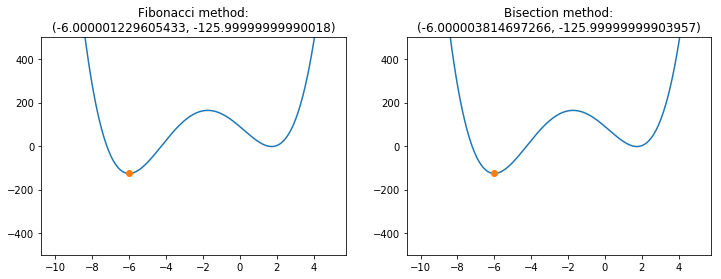

In [36]:
a, b = [-10, 5]

x = np.linspace(a, b, num=500)
y = [-500, 500]

fibMin = fibonacciMethod(f, a, b)
bisMin = bisectionMethod(f, a, b)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_ylim(y)
ax2.set_ylim(y)

plt.gca().set_aspect('auto', adjustable='box')

ax1.plot(x, f(x))
ax1.set_title(f"Fibonacci method:\n({fibMin[0]}, {fibMin[1]})")
ax1.plot(fibMin[0], fibMin[1], 'o')

ax2.plot(x, f(x))
ax2.set_title(f"Bisection method:\n({bisMin[0]}, {bisMin[1]})")
ax2.plot(bisMin[0], bisMin[1], 'o')

plt.show()